In [2]:
#Data Manipulation library 
import pandas as pd 
import numpy as np 
#Data Visualization library
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
#Statistical Analysis Library
from scipy import stats

### Analysis Goals:

Device Distribution:
How many sessions are generated by each device type?
Which device types have higher engagement (e.g., page views per session) or conversions?

Operating System Distribution:
Which OS is the most commonly used?
Does one OS have better engagement or conversion rates?

### Step 1: Load the Shopify Dataset

In [5]:
df = pd.read_csv('Desktop/DSFP4.0/MODULE7.0_PYTHON/Assignment/shopify_data_seller2.csv')

## Display the first 5 rows of the dataset
df.head()

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


### Get more information about the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   page_type            25000 non-null  object 
 1   location_country     25000 non-null  object 
 2   referrer_host        25000 non-null  object 
 3   ua_os                25000 non-null  object 
 4   hour                 25000 non-null  object 
 5   total_orders_placed  25000 non-null  int64  
 6   total_checkouts      25000 non-null  int64  
 7   total_carts          25000 non-null  int64  
 8   total_sessions       25000 non-null  int64  
 9   total_pageviews      25000 non-null  int64  
 10  total_conversion     25000 non-null  float64
 11  total_bounce_rate    25000 non-null  float64
 12  ua_form_factor       25000 non-null  object 
 13  referrer_source      10491 non-null  object 
 14  referrer_name        4972 non-null   object 
dtypes: float64(2), int64(5), object(8)
m

### Checking for null values per column 

In [9]:
df.isnull().sum()

page_type                  0
location_country           0
referrer_host              0
ua_os                      0
hour                       0
total_orders_placed        0
total_checkouts            0
total_carts                0
total_sessions             0
total_pageviews            0
total_conversion           0
total_bounce_rate          0
ua_form_factor             0
referrer_source        14509
referrer_name          20028
dtype: int64

### Knowing the parameters contained in the columns with null values 

In [11]:
df['referrer_source'] 

0        Unknown
1            NaN
2            NaN
3            NaN
4         Social
          ...   
24995        NaN
24996     Search
24997        NaN
24998    Unknown
24999        NaN
Name: referrer_source, Length: 25000, dtype: object

In [12]:
df ['referrer_name']

0              NaN
1              NaN
2              NaN
3              NaN
4        Instagram
           ...    
24995          NaN
24996       Google
24997          NaN
24998          NaN
24999          NaN
Name: referrer_name, Length: 25000, dtype: object

### Dropping columns with null values 

In [14]:
df = df.drop(['referrer_source', 'referrer_name'], axis=1)


### Printing the first 3 rows to confirm the null values are no more in the Dataset

In [16]:
df.head(3)

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.0,1.0,Desktop
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.0,1.0,Mobile
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.0,1.0,Desktop


### confirming that there are no more columns with null values 

In [18]:
df.isnull().sum()

page_type              0
location_country       0
referrer_host          0
ua_os                  0
hour                   0
total_orders_placed    0
total_checkouts        0
total_carts            0
total_sessions         0
total_pageviews        0
total_conversion       0
total_bounce_rate      0
ua_form_factor         0
dtype: int64

### Checking the data types of each column

In [20]:
df.dtypes

page_type               object
location_country        object
referrer_host           object
ua_os                   object
hour                    object
total_orders_placed      int64
total_checkouts          int64
total_carts              int64
total_sessions           int64
total_pageviews          int64
total_conversion       float64
total_bounce_rate      float64
ua_form_factor          object
dtype: object

In [21]:
df.head(2)

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.0,1.0,Desktop
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.0,1.0,Mobile


In [22]:
df.shape

(25000, 13)

In [23]:
df.describe()

,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619
std,1.095525,1.705321,2.275964,2.844466,5.208085,0.137343,0.272584
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,11.000000,19.000000,26.000000,29.000000,57.000000,0.857143,1.000000


In [24]:
df.columns

Index(['page_type', 'location_country', 'referrer_host', 'ua_os', 'hour',
       'total_orders_placed', 'total_checkouts', 'total_carts',
       'total_sessions', 'total_pageviews', 'total_conversion',
       'total_bounce_rate', 'ua_form_factor'],
      dtype='object')

In [25]:
df.head(2)

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.0,1.0,Desktop
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.0,1.0,Mobile


In [26]:
df.dtypes

page_type               object
location_country        object
referrer_host           object
ua_os                   object
hour                    object
total_orders_placed      int64
total_checkouts          int64
total_carts              int64
total_sessions           int64
total_pageviews          int64
total_conversion       float64
total_bounce_rate      float64
ua_form_factor          object
dtype: object

### converting numerical columns containingg strings and floats to integers

In [28]:
num_data = [df['total_orders_placed'], df['total_checkouts'], df['total_carts'], df['total_sessions'], df['total_pageviews'], df['total_conversion'], df['total_bounce_rate']]

In [29]:
df['total_orders_placed'] = df['total_orders_placed'].astype(str).str.replace(',', '').astype(int)
df['total_checkouts'] = df['total_checkouts'].astype(str).str.replace(',', '').astype(int)
df['total_carts'] = df['total_carts'].astype(str).str.replace(',', '').astype(int)
df['total_sessions'] = df['total_sessions'].astype(str).str.replace(',', '').astype(int)
df['total_pageviews'] =  df['total_pageviews'].astype(str).str.replace(',', '').astype(int)


### Device Distribution Analysis


In [31]:
# Group by device type and count sessions
device_sessions = df.groupby('ua_os')['total_sessions'].sum().reset_index()

# Sort and display
device_sessions = device_sessions.sort_values(by='total_sessions', ascending=False)
print(device_sessions)

            ua_os  total_sessions
0         Android           26745
10            iOS            7794
3           Linux            3922
5           Other            3910
8         Windows            3782
4        Mac OS X            3774
1       Chrome OS             721
6           Tizen             158
2          Fedora             132
9   Windows Phone              29
7          Ubuntu              25


### Engagement: Page views per session by device type


In [33]:
# Calculate engagement (page views per session) for each device type
df['engagement'] = df['total_pageviews'] / df['total_sessions']
device_engagement = df.groupby('ua_os')['engagement'].mean().reset_index()

# Sort and display
device_engagement = device_engagement.sort_values(by='engagement', ascending=False)
print(device_engagement)

            ua_os  engagement
5           Other    1.614406
6           Tizen    1.401719
0         Android    1.313097
1       Chrome OS    1.285927
4        Mac OS X    1.058885
9   Windows Phone    1.049383
7          Ubuntu    1.038596
10            iOS    1.023009
8         Windows    1.013413
3           Linux    1.006484
2          Fedora    1.003968


### Conversion rates by device type


In [35]:
# Calculate conversion rates (conversions per session) for each device type
df['conversion_rate'] = df['total_conversion'] / df['total_sessions']
device_conversion = df.groupby('ua_os')['conversion_rate'].mean().reset_index()

# Sort and display
device_conversion = device_conversion.sort_values(by='conversion_rate', ascending=False)
print(device_conversion)

            ua_os  conversion_rate
5           Other         0.049463
0         Android         0.030090
1       Chrome OS         0.028390
6           Tizen         0.024823
7          Ubuntu         0.010058
4        Mac OS X         0.006841
9   Windows Phone         0.004115
10            iOS         0.002646
8         Windows         0.001946
2          Fedora         0.000992
3           Linux         0.000875


### Visualize device distribution

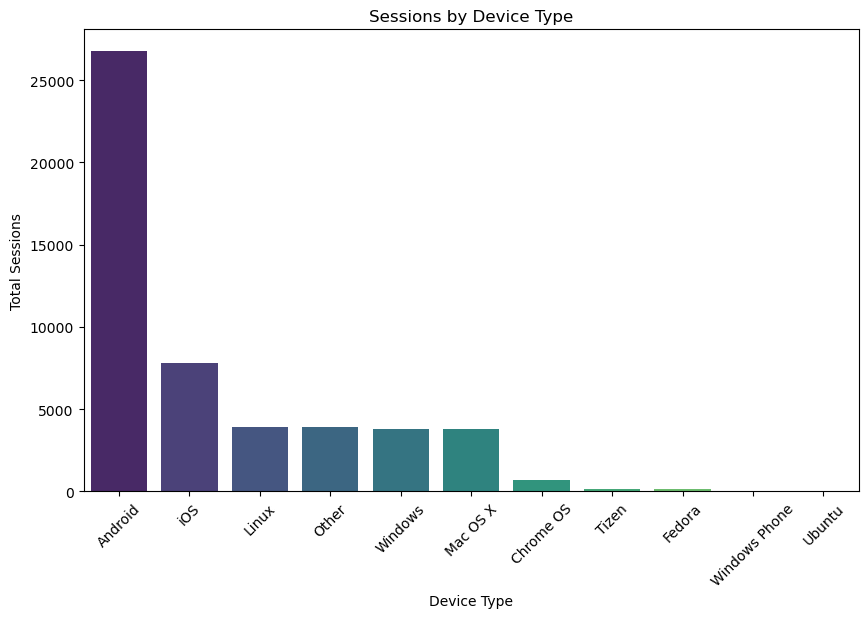

In [37]:
# Bar chart for sessions by device type
plt.figure(figsize=(10, 6))
sns.barplot(x='ua_os', y='total_sessions', data=device_sessions, palette='viridis')
plt.title('Sessions by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.show()

### Operating System Distribution Analysis

In [39]:
# Group by operating system and count sessions
os_sessions = df.groupby('ua_os')['total_sessions'].sum().reset_index()

# Sort and display
os_sessions = os_sessions.sort_values(by='total_sessions', ascending=False)
print(os_sessions)

            ua_os  total_sessions
0         Android           26745
10            iOS            7794
3           Linux            3922
5           Other            3910
8         Windows            3782
4        Mac OS X            3774
1       Chrome OS             721
6           Tizen             158
2          Fedora             132
9   Windows Phone              29
7          Ubuntu              25


### Engagement: Page views per session by OS


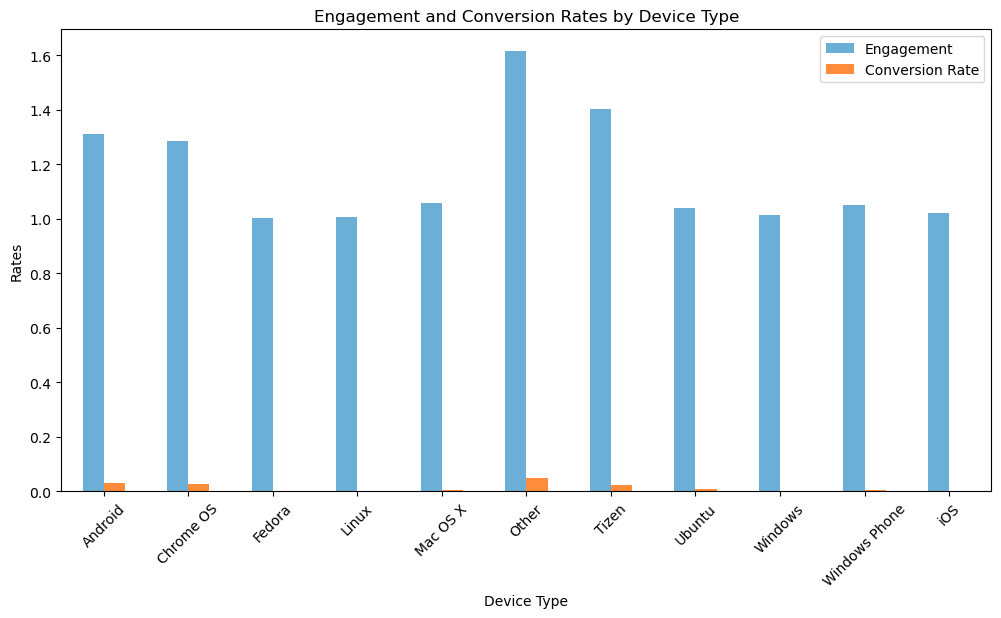

In [41]:
# Bar chart for engagement and conversion rates by device type
device_stats = df.groupby('ua_os').agg({'engagement': 'mean', 'conversion_rate': 'mean'}).reset_index()

device_stats.plot(x='ua_os', kind='bar', figsize=(12, 6), stacked=False, color=['#6baed6', '#fd8d3c'])
plt.title('Engagement and Conversion Rates by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Rates')
plt.xticks(rotation=45)
plt.legend(['Engagement', 'Conversion Rate'])
plt.show()

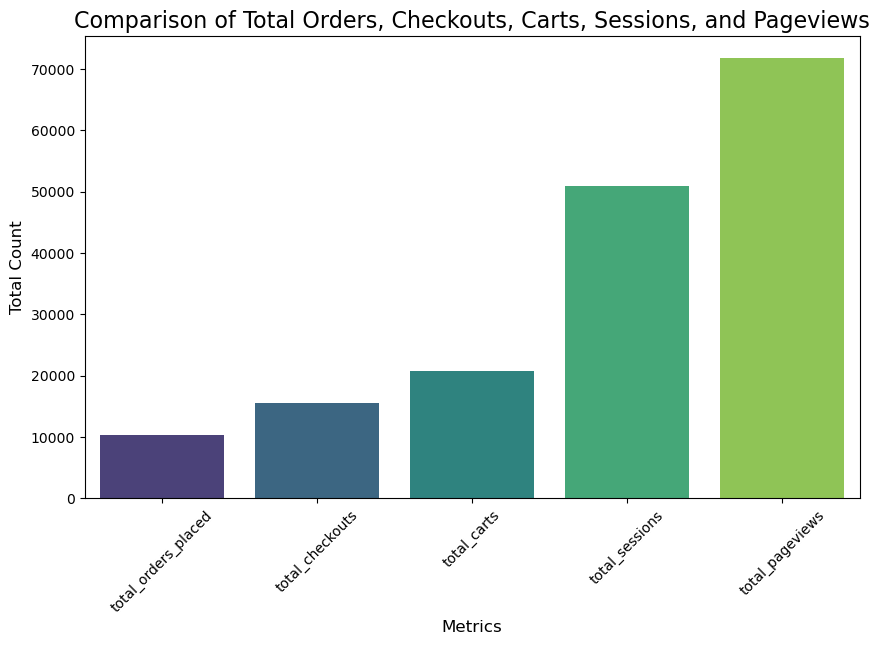

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics = ['total_orders_placed', 'total_checkouts', 'total_carts', 'total_sessions', 'total_pageviews']
values = df[metrics].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=values.index, y=values.values, palette="viridis")

# Add labels and title
plt.title('Comparison of Total Orders, Checkouts, Carts, Sessions, and Pageviews', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

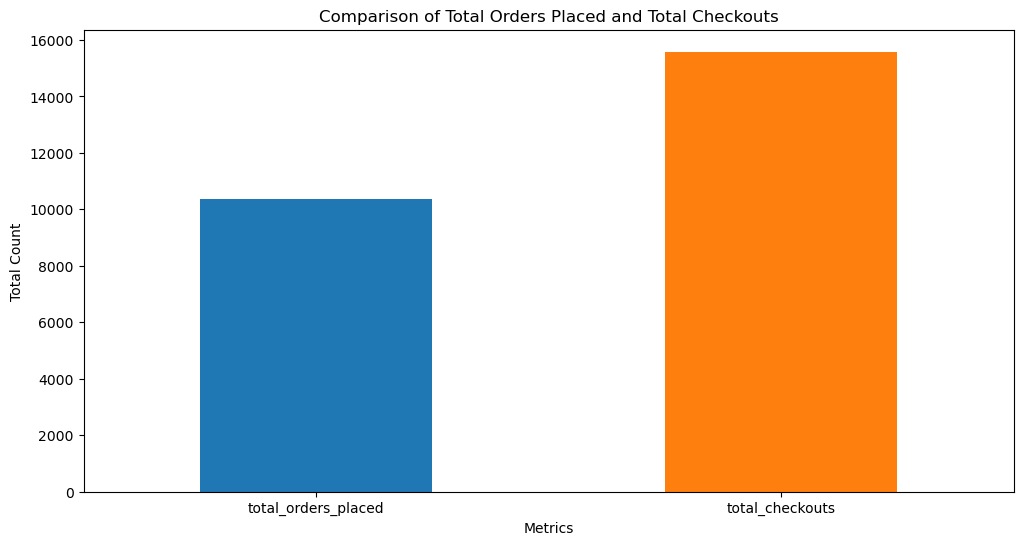

In [43]:
plt.figure(figsize=(12, 6))
df[['total_orders_placed', 'total_checkouts']].sum().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of Total Orders Placed and Total Checkouts')
plt.xlabel('Metrics')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()

In [44]:
df['total_bounce_rate'] = df['total_bounce_rate'].astype(int)
df['total_pageviews'] = df['total_pageviews'].astype(int)

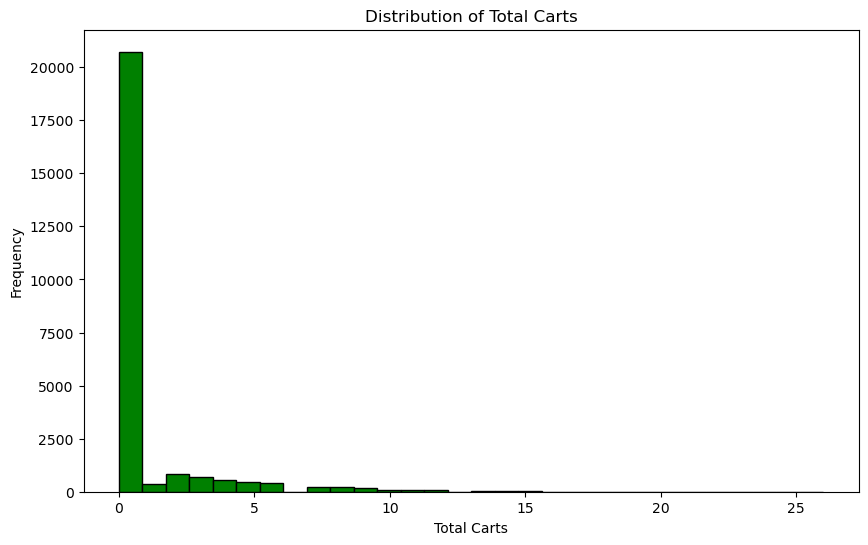

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_carts'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Total Carts')
plt.xlabel('Total Carts')
plt.ylabel('Frequency')
plt.show()

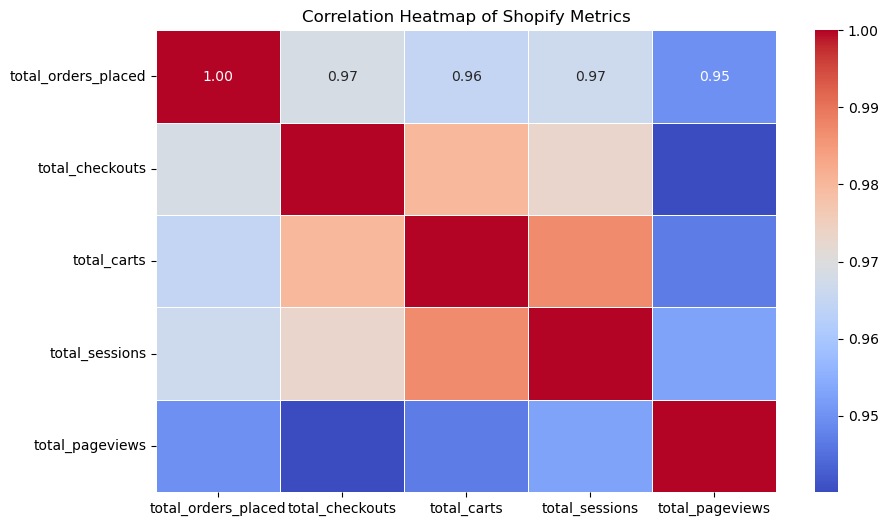

In [46]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[['total_orders_placed', 'total_checkouts', 'total_carts', 'total_sessions', 'total_pageviews']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Shopify Metrics')
plt.show()

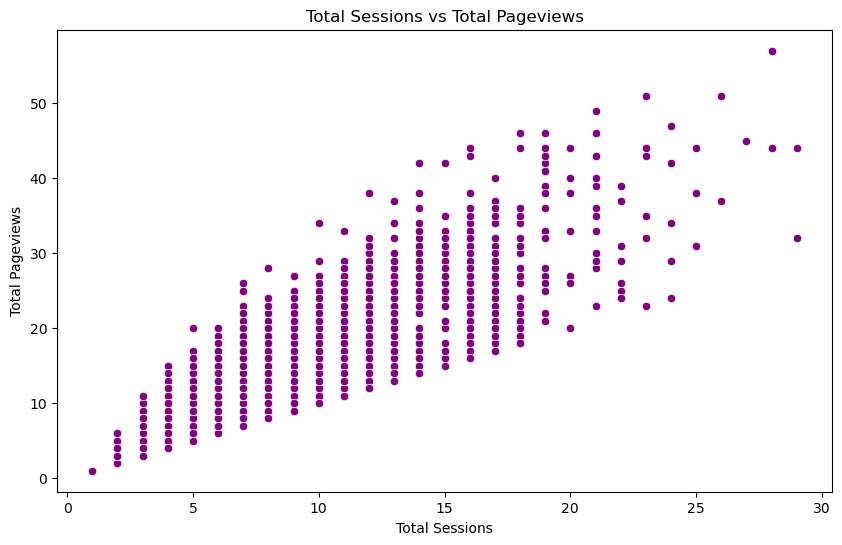

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sessions', y='total_pageviews', data=df, color='purple')
plt.title('Total Sessions vs Total Pageviews')
plt.xlabel('Total Sessions')
plt.ylabel('Total Pageviews')
plt.show()

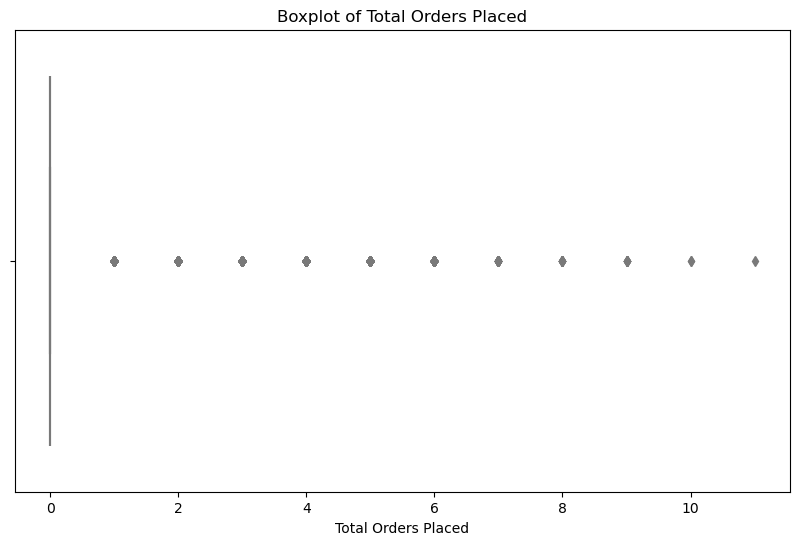

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_orders_placed', data=df, color='lightblue')
plt.title('Boxplot of Total Orders Placed')
plt.xlabel('Total Orders Placed')
plt.show()

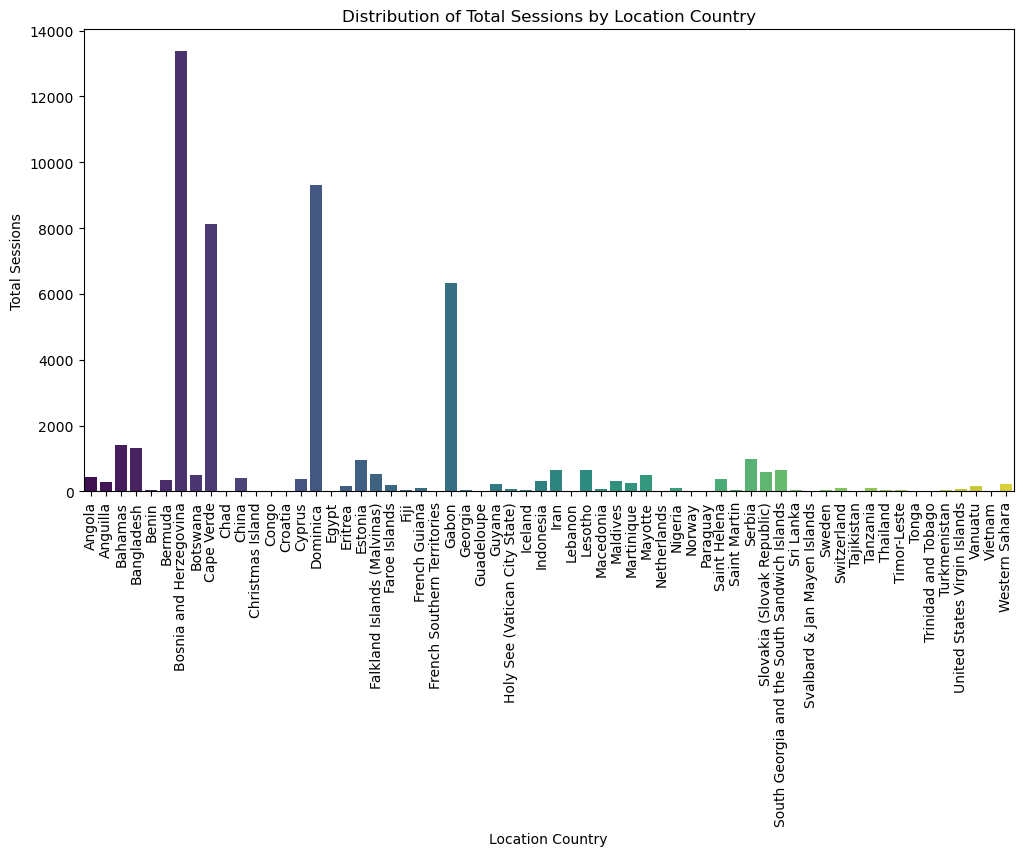

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the data to prepare for plotting
aggregated_data = df.groupby(['location_country'])[['total_orders_placed', 'total_sessions']].sum().reset_index()

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='location_country', y='total_sessions', data=aggregated_data, palette='viridis')

# Add titles and labels
plt.title('Distribution of Total Sessions by Location Country')
plt.xlabel('Location Country')
plt.ylabel('Total Sessions')
plt.xticks(rotation=90)
plt.show()